### Importing the libraries

In [109]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import datetime as dt
from scipy.stats import pearsonr

### Importing the dataset

In [110]:
df = pd.read_csv('DataCoSupplyChainDataset.csv')

### Basic Data Exploration

In [111]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajast�n,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajast�n,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [112]:
df.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shangh�i,China,1005,1/16/2016 3:40,26043,1004,0.0,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shangh�i,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Jap�n,9141,1/16/2016 1:34,26037,1004,4.0,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,291,Smith,XXXXXXXXX,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,291,1/15/2016 21:00,26024,1004,8.0,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,2813,Smith,XXXXXXXXX,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2813,1/15/2016 20:18,26022,1004,12.0,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Andrea,7547,Ortega,XXXXXXXXX,Consumer,PR,697 Little Meadow,725.0,7,Fan Shop,18.290380,-66.370613,Pacific Asia,Nagercoil,India,7547,1/15/2016 18:54,26018,1004,16.0,0.04,65113,399.980011,0.44,1,399.980011,383.980011,168.949997,South Asia,Tamil Nadu,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [113]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping d

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [115]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [116]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Dropping the unnecessary columns

In [117]:
data = df.copy()
FeatureList = ['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
             'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
             'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude','Market', 
             'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
             'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
             'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 
             'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 
             'Order Zipcode', 'Product Card Id','Product Category Id', 'Product Description', 'Product Image', 
             'Product Name', 'Product Price', 'Product Status','shipping date (DateOrders)', 'Shipping Mode']

In [118]:
df1 = df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajast�n,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajast�n,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### EDA

#### Plot for the delivery status

In [119]:
data_delivery_status = df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name = 'Number of Orders').sort_values(by = 'Number of Orders',
                                                                                                                           ascending = False)
px.bar(x = data_delivery_status['Delivery Status'],y = data_delivery_status['Number of Orders'], 
       color = data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

#### Top 10 customers based on number of orders

In [120]:
df1['Customer_ID_STR'] = df1['Customer Id'].astype(str)
data_customers = df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name = 'Number of Orders').sort_values(by = 'Number of Orders',
                                                                                                                         ascending = False)
px.bar(data_customers.head(10),x ='Number of Orders', y = 'Customer_ID_STR' , color = 'Number of Orders')

<ipython-input-120-50327f1c81a3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Top 10 customers which have given the company the most profit

In [121]:
df1['Customer_ID_STR'] = df1['Customer Id'].astype(str)
data_customers_profit = df1.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name = 'Profit of Orders').sort_values(by = 'Profit of Orders',
                                                                                                                                            ascending = False)
px.bar(data_customers_profit.head(10),x = 'Profit of Orders', y = 'Customer_ID_STR' , color = 'Profit of Orders')

<ipython-input-121-2a22006dbfc2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Customer Segmentation

In [122]:
data_Customer_Segment = df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name = 'Number of Orders').sort_values(by = 'Number of Orders', 
                                                                                                                                 ascending = False)
px.pie(data_Customer_Segment, values = 'Number of Orders', names = 'Customer Segment' , 
       title = 'Number of Orders of different Customer Segments', width = 600 , height = 600 , 
       color_discrete_sequence = px.colors.sequential.RdBu)

#### Categories according to top orders

In [123]:
data_Category_Name = df1.groupby(['Category Name'])['Order Id'].count().reset_index(name = 'Number of Orders').sort_values(by = 'Number of Orders', 
                                                                                                                           ascending = True)
px.bar(data_Category_Name, x = 'Number of Orders',y = 'Category Name',color = 'Number of Orders')

#### Countries according to top orders

In [124]:
data_Region = df1.groupby(['Order Region'])['Order Id'].count().reset_index(name = 'Number of Orders').sort_values(by = 'Number of Orders', 
                                                                                                                   ascending = True)
px.bar(data_Region, x ='Number of Orders',y = 'Order Region',color = 'Number of Orders')

#### Sales Analysis by Country

In [125]:
df_sales_country = df1.groupby(['Order Country'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by = 'Sales of Orders', 
                                                                                                                   ascending = False)
px.bar(df_sales_country.head(10), x = 'Sales of Orders',y = 'Order Country',color = 'Sales of Orders')

#### Sales Analysis by Product

In [126]:
df_sales_country = df1.groupby(['Product Name'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by = 'Sales of Orders', 
                                                                                                                  ascending = False)
px.bar(df_sales_country.head(10), x = 'Sales of Orders',y = 'Product Name',color = 'Sales of Orders')

#### Sales Analysis by Product and Delivery Status

In [127]:
df_sales_pd=df1.groupby(['Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by = 'Sales of Orders', 
                                                                                                                              ascending = False)
px.bar(df_sales_pd.head(10), x = 'Sales of Orders',y = 'Product Name',color = 'Delivery Status')

#### Sales Analysis by Product and Order Region

In [128]:
df_sales_pr = df1.groupby(['Product Name', 'Order Region'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by = 'Sales of Orders',
                                                                                                                             ascending = False)
px.bar(df_sales_pr.head(10), x = 'Sales of Orders',y = 'Product Name',color = 'Order Region')

#### Sales Analysis by Category

In [129]:
df_sales_pr = df1.groupby(['Category Name'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by = 'Sales of Orders', 
                                                                                                              ascending = False)
px.bar(df_sales_pr.head(10), x = 'Sales of Orders',y = 'Category Name',color = 'Sales of Orders')

#### Sales Analysis by Payment Method

In [130]:
df_sales_pr = df1.groupby(['Type'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by = 'Sales of Orders', 
                                                                                                     ascending = False)
px.bar(df_sales_pr.head(10), x ='Sales of Orders',y = 'Type',color = 'Sales of Orders')

### Date and Sales Analysis

In [131]:
data_orderdate = df[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

<ipython-input-131-0d4dde14f68e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year

<ipython-input-132-760df835511f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-760df835511f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-760df835511f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Plot for Sales per Year

In [133]:
data_orderdate['YearStr'] = data_orderdate['year'].astype(str)
df_sales_year = data_orderdate.groupby([ 'YearStr'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_year, x = 'Sales of Orders',y = 'YearStr',color = 'Sales of Orders')

<ipython-input-133-1777eb84a265>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Plot for Sales per Quater

In [134]:
data_orderdate['QuarterStr'] = data_orderdate['Quarter'].astype(str)
df_sales_quarter = data_orderdate.groupby([ 'YearStr','QuarterStr'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by = 'Sales of Orders', 
                                                                                                                                      ascending = False)
px.bar(df_sales_quarter, x = 'Sales of Orders',y = 'QuarterStr',color = 'YearStr')

<ipython-input-134-c03cfcec8c4d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Forecasting

#### Predicting if the entry is fraud or no

In [135]:
data = df1.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def Labelencoder_feature(x):
    le = LabelEncoder()
    x = le.fit_transform(x)
    return x

In [137]:
features = data.drop(columns = ['SUSPECTED_FRAUD','Order Status' ])
target = data['SUSPECTED_FRAUD']

In [138]:
features.isnull().sum()

Type                               0
Benefit per order                  0
Sales per customer                 0
Delivery Status                    0
Late_delivery_risk                 0
Category Name                      0
Customer City                      0
Customer Country                   0
Customer Id                        0
Customer Segment                   0
Customer State                     0
Customer Zipcode                   3
Department Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order City                         0
Order Country                      0
Order Customer Id                  0
order date (DateOrders)            0
Order Id                           0
Order Item Cardprod Id             0
Order Item Discount                0
Order Item Discount Rate           0
Order Item Id                      0
Order Item Product Price           0
Order Item Profit Ratio            0
O

In [139]:
features = features.apply(Labelencoder_feature)
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR
0,1,18934,2568,0,0,40,66,1,20649,0,36,7,4,3624,4420,3,331,70,20649,5961,65749,114,426,4,180516,62,140,0,166,2568,18934,15,475,609,114,47,0,78,78,62,0,27149,3,11912
1,3,2272,2559,1,1,40,66,1,19386,0,36,7,4,5522,4419,3,391,69,19386,1147,64486,114,498,5,179253,62,44,0,166,2559,2272,13,841,609,114,47,0,78,78,62,0,2209,3,10509
2,0,2293,2555,3,0,40,452,0,19385,0,5,941,4,9146,232,3,391,69,19385,1146,64485,114,529,6,179252,62,44,0,166,2555,2293,13,841,609,114,47,0,78,78,62,0,1980,3,10508
3,1,13638,2546,0,0,40,285,0,19384,2,5,720,4,8467,663,3,3226,8,19384,1145,64484,114,600,7,179251,62,119,0,166,2546,13638,11,835,609,114,47,0,78,78,62,0,1752,3,10507
4,2,20599,2526,0,0,40,66,1,19383,1,36,7,4,3783,4421,3,3226,8,19383,1144,64483,114,682,8,179250,62,156,0,166,2526,20599,11,835,609,114,47,0,78,78,62,0,1528,3,10505


#### Deleting features with high collinearity

In [140]:
data1 = pd.concat([features,target],axis = 1)

#### Avoiding multicolinearity

In [141]:
corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 'Product Status', 'Shipping Mode', 'Customer_ID_STR', 'SUSPECTED_FRAUD'], dtype='object')

In [142]:
features1=features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 
                    'Product Status', 'Shipping Mode', 'Customer_ID_STR']]

In [143]:
corre = pd.DataFrame()
for i in features1.columns:
    corre[i] = pearsonr(target, features1[i])
corre

/Users/pranavbhandari/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Region,Order State,Order Zipcode,Product Description,Product Image,Product Status,Shipping Mode,Customer_ID_STR
0,0.202094,-0.002586,-0.000807,0.128768,-0.167158,-0.002104,-0.003561,0.006756,0.009375,-0.005935,0.005670,-0.005600,-0.000837,-0.004709,0.005100,-0.000293,-0.005889,-0.004928,0.003002,0.002222,-0.001109,0.002893,0.002271,0.000315,-0.000757,0.009077,-0.006105,0.004666,NaN,-0.000741,NaN,-0.004641,0.000490
1,0.000000,0.271923,0.731807,0.000000,0.000000,0.371352,0.130283,0.004098,0.000068,0.011686,0.016001,0.017337,0.722187,0.045427,0.030231,0.900798,0.012345,0.036290,0.202217,0.345187,0.637360,0.219059,0.334515,0.893383,0.747677,0.000115,0.009491,0.047437,NaN,0.752963,NaN,0.048639,0.835012


In [144]:
corre1=corre.T

In [145]:
coore2= corre1.iloc[:,0].sort_values(ascending=False)
coore2

Type                        0.202094
Delivery Status             0.128768
Customer Id                 0.009375
Order Region                0.009077
Customer Country            0.006756
Customer State              0.005670
Longitude                   0.005100
Order Zipcode               0.004666
order date (DateOrders)     0.003002
Order Item Discount         0.002893
Order Item Discount Rate    0.002271
Order Id                    0.002222
Customer_ID_STR             0.000490
Order Item Product Price    0.000315
Market                     -0.000293
Product Image              -0.000741
Order Item Quantity        -0.000757
Sales per customer         -0.000807
Department Name            -0.000837
Order Item Cardprod Id     -0.001109
Category Name              -0.002104
Benefit per order          -0.002586
Customer City              -0.003561
Shipping Mode              -0.004641
Latitude                   -0.004709
Order Country              -0.004928
Customer Zipcode           -0.005600
O

In [146]:
coore2.index

Index(['Type', 'Delivery Status', 'Customer Id', 'Order Region', 'Customer Country', 'Customer State', 'Longitude', 'Order Zipcode', 'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate', 'Order Id', 'Customer_ID_STR', 'Order Item Product Price', 'Market', 'Product Image', 'Order Item Quantity', 'Sales per customer', 'Department Name', 'Order Item Cardprod Id', 'Category Name', 'Benefit per order', 'Customer City', 'Shipping Mode', 'Latitude', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State', 'Late_delivery_risk', 'Product Description', 'Product Status'], dtype='object')

In [147]:
new_features= ['Type', 'Delivery Status', 'Order Region', 'Customer Country', 'Customer State', 'Order Zipcode',
               'Shipping Mode', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
               'Late_delivery_risk', 'Product Description', 'Product Status']

### Feature Selection

In [148]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(features, target)

/Users/pranavbhandari/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning:

invalid value encountered in true_divide



In [149]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results = pd.DataFrame(f_reg_results, columns = ['Variable','F_Value', 'P_Value'])

In [150]:
f_reg_results = pd.DataFrame(f_reg_results, columns = ['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by = ['P_Value'])
f_reg_results.P_Value = f_reg_results.P_Value.astype(float)
f_reg_results = f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,7686.615869,0.000
18,Order Customer Id,15.868141,0.000
3,Delivery Status,3043.655705,0.000
4,Late_delivery_risk,5188.953532,0.000
31,Order Region,14.875551,0.000
8,Customer Id,15.868141,0.000
7,Customer Country,8.239934,0.004
32,Order State,6.728235,0.009
16,Order City,6.260807,0.012
9,Customer Segment,6.358072,0.012


In [151]:
f_reg_list = f_reg_results.Variable.values
f_reg_list

array(['Type', 'Order Customer Id', 'Delivery Status',
       'Late_delivery_risk', 'Order Region', 'Customer Id',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Longitude', 'Order Country', 'Latitude', 'Order Zipcode',
       'shipping date (DateOrders)', 'Shipping Mode'], dtype=object)

In [152]:
final_features=features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]

In [153]:
final_data = pd.concat([final_features, target], axis=1)

<AxesSubplot:>

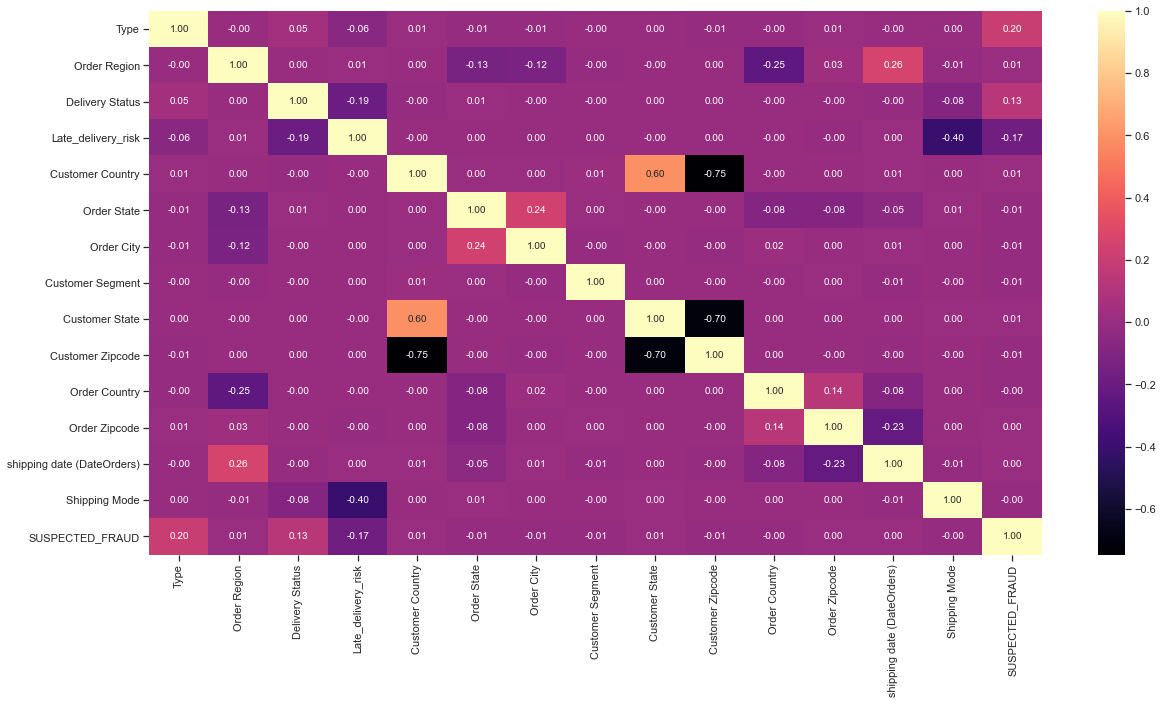

In [154]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

#### Deleting high correlation columns

In [155]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])

### Model Building

In [156]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size = 0.2, random_state = 42)

In [158]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])

In [159]:
pip_dict1 = {0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }

In [160]:
piplines1 = [lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]

In [161]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features2, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.9764456985828234
RandomForestClassifier :  0.9915687463087297
KNeighborsClassifier :  0.9817637011135805
GaussianNB :  0.9795478562150082
SGDClassifier :  0.9774982135396149
DecisionTreeClassifier :  0.9932084544341295


#### Improving the model

In [162]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },]

In [163]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])
random_search = RandomizedSearchCV(estimator = pipeline_new, 
                                   param_distributions = grid_params, 
                                   scoring = 'neg_mean_absolute_error', 
                                   n_jobs= -1, 
                                   cv = 8, 
                                   verbose = 10, 
                                   random_state = 42)

In [164]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [165]:
best_model.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_features': 'log2',
 'classifier__criterion': 'entropy',
 'classifier': RandomForestClassifier(criterion='entropy', max_features='log2')}

In [166]:
pipeline_rf = Pipeline([('scaler', StandardScaler()), 
                           ('Random Forest Calssifer', RandomForestClassifier(criterion = 'entropy', 
                                                                              max_features = 'sqrt',
                        n_estimators = 150))])

In [167]:
model = pipeline_rf.fit(X_train, y_train)

In [168]:
rf_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
rf_train_predict.head()

,actual,predicted
116587,0,0
36340,0,0
175763,0,0
96918,0,0
71197,0,0


In [169]:
rf_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
rf_test_predict.head()

,actual,predicted
80120,0,0
19670,0,0
114887,0,0
120110,0,0
56658,0,0


In [170]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

Accuracy Score for train dataset :  1.0
Accuracy Score for test dataset :  0.9967593618435631


In [171]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rf_train_predict.actual, rf_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

ROC-AUC Score for train dataset :  1.0
ROC-AUC Score for validation dataset :  0.9616012534247261


#### Building the confusion matrix

/Users/pranavbhandari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



<AxesSubplot:>

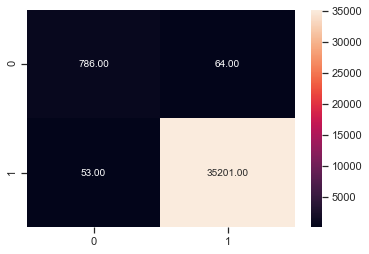

In [172]:
conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted, [1,0])
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

In [173]:
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35254
           1       0.94      0.92      0.93       850

    accuracy                           1.00     36104
   macro avg       0.97      0.96      0.96     36104
weighted avg       1.00      1.00      1.00     36104



### References

1) https://www.kaggle.com/pvmanish/group-9
\
2) https://www.kaggle.com/sanketchavan5595/data-analysis-smart-supply-chain
\
3) https://www.kaggle.com/danielsilvaavila/big-data-analysis
\
4) https://www.kaggle.com/nilufarhosseini/supply-chain-data-analysis-99-accuracy/data
\
5) https://www.kaggle.com/sukanthen/e-commerce-multi-output-models-project-cse07